In [1]:
from fastai.tabular.all import *
from pathlib import Path
import os


In [2]:
# path = Path("C:/Users/jordom2/OneDrive - kochind.com/Files/Code/PiTorch/data/Titanic/train.csv")
path = Path(os.getcwd()).parent.parent
path = path/'data/Titanic'
path

Path('d:/OneDrive/Code/Python/Training/ML/Tests/data/Titanic')

In [3]:
pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

#read Data
data = pd.read_csv(path/'train.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [4]:
#feature Selection:
#https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial/  notebook showing selecting alot of features
df = data.copy()

def add_features(df):
    df['LogFare'] = np.log1p(df['Fare'])
    df['Deck'] = df.Cabin.str[0].map(dict(A="ABC", B="ABC", C="ABC", D="DE", E="DE", F="FG", G="FG"))
    df['Family'] = df.SibSp+df.Parch
    df['Alone'] = df.Family==1
    df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')
    df['Title'] = df.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    df['Title'] = df.Title.map(dict(Mr="Mr",Miss="Miss",Mrs="Mrs",Master="Master")).value_counts(dropna=False)

add_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Family,Alone,TicketFreq,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,2.11,NaN,1,True,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C,4.28,ABC,1,True,1,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,2.19,NaN,0,False,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,3.99,ABC,1,True,2,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,2.20,NaN,0,False,1,NaN


In [5]:
#The functions return two lists - a list of indices or masks for each of training and validation sets
splits = RandomSplitter(seed=42)(df)

In [6]:
# Use splits for indices of training and validation sets:
# splits=splits,
# Turn strings into categories, fill missing values in numeric columns with the median, normalise all numeric columns:
# procs = [Categorify, FillMissing, Normalize],
# These are the categorical independent variables:
# cat_names=["Sex","Pclass","Embarked","Deck", "Title"],
# These are the continuous independent variables:
# cont_names=['Age', 'SibSp', 'Parch', 'LogFare', 'Alone', 'TicketFreq', 'Family'],
# This is the dependent variable:
# y_names="Survived",
# The dependent variable is categorical (so build a classification model, not a regression model):
# y_block = CategoryBlock(),

dls = TabularPandas(
    df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["Sex","Pclass","Embarked","Deck", "Title"],
    cont_names=['Age', 'SibSp', 'Parch', 'LogFare', 'Alone', 'TicketFreq', 'Family'],
    y_names="Survived", y_block = CategoryBlock(),
).dataloaders(path=".")

In [7]:
#train Model:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.0831763744354248, valley=0.007585775572806597)

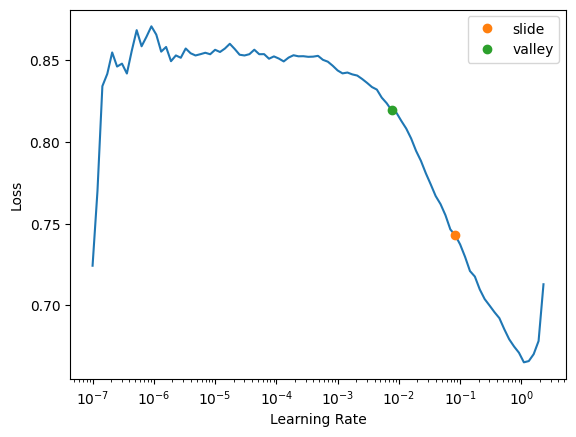

In [8]:
#find learning rate to use
learn.lr_find(suggest_funcs=(slide, valley))

In [10]:
#fit model ie. Train
# with learn.no_bar(), learn.no_logging():
learn.fit(1, lr=0.01)
    

epoch,train_loss,valid_loss,accuracy,time
0,0.513418,0.512856,0.775281,00:00


In [30]:
learn.recorder.losses

[TensorBase(0.2094),
 TensorBase(0.1900),
 TensorBase(0.2285),
 TensorBase(0.2488),
 TensorBase(0.2412),
 TensorBase(0.2620),
 TensorBase(0.2589),
 TensorBase(0.2639),
 TensorBase(0.2782),
 TensorBase(0.2661),
 TensorBase(0.2718),
 TensorBase(0.2627),
 TensorBase(0.2542),
 TensorBase(0.2591),
 TensorBase(0.2569),
 TensorBase(0.2549),
 TensorBase(0.2522),
 TensorBase(0.2573),
 TensorBase(0.2597),
 TensorBase(0.2622),
 TensorBase(0.2613),
 TensorBase(0.2570),
 TensorBase(0.2558),
 TensorBase(0.2582),
 TensorBase(0.2602),
 TensorBase(0.2561),
 TensorBase(0.2548),
 TensorBase(0.2573),
 TensorBase(0.2552),
 TensorBase(0.2560),
 TensorBase(0.2523),
 TensorBase(0.2525),
 TensorBase(0.2552),
 TensorBase(0.2528),
 TensorBase(0.2532),
 TensorBase(0.2501),
 TensorBase(0.2541),
 TensorBase(0.2498),
 TensorBase(0.2524),
 TensorBase(0.2568),
 TensorBase(0.2584),
 TensorBase(0.2603),
 TensorBase(0.2621),
 TensorBase(0.2615),
 TensorBase(0.2616),
 TensorBase(0.2628),
 TensorBase(0.2630),
 TensorBase(0

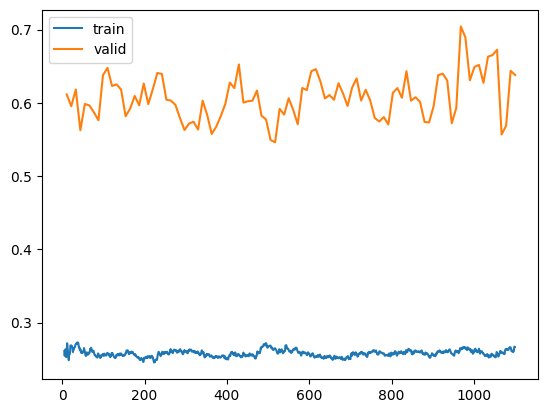

In [33]:
learn.recorder.plot_loss()

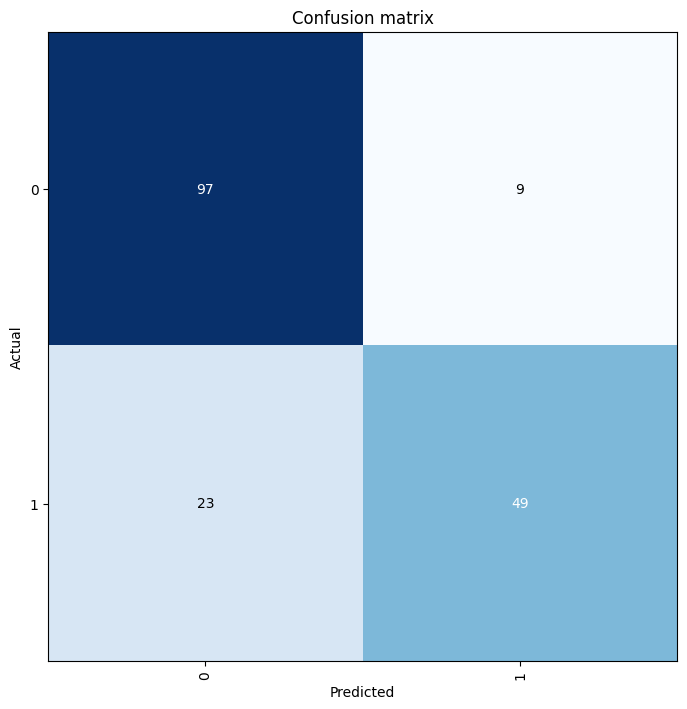

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(7, 7), dpi=100)

In [108]:
#see how model does on test dataset:
tst_Data = pd.read_csv(path/'test.csv')
tst_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [109]:
tst_df = tst_Data.copy()
tst_df['Fare'] = tst_df.Fare.fillna(0)
add_features(tst_df)
tst_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Family,Alone,TicketFreq,Title
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q,2.18,NaN,0,False,1,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,2.08,NaN,1,True,1,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q,2.37,NaN,0,False,1,NaN
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S,2.27,NaN,0,False,1,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S,2.59,NaN,2,False,1,NaN


In [110]:
#apply same steps we did for train dataloader to test dataloader
tst_dl = learn.dls.test_dl(tst_df)

In [111]:
#do predictions: predictions will return list of two values [0, 1], 0 = not servived, 1 = servived 
preds,_ = learn.get_preds(dl=tst_dl)

In [115]:
#get values of 
tst_df['Survived'] = (preds[:,1]>0.5).int()
tst_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Family,Alone,TicketFreq,Title,Survived
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q,2.18,NaN,0,False,1,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,2.08,NaN,1,True,1,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q,2.37,NaN,0,False,1,NaN,0
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S,2.27,NaN,0,False,1,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S,2.59,NaN,2,False,1,NaN,0


In [116]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
